De acuerdo al cuestionario del lunes, ustedes respondieron "Respuestas", usando Respuestas y Random_nums responde la siguientes preguntas

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
respuestas = ["6","pi","Lentes","5","8","11",
              "10000000","3.1416","1","8","53",
              "58","5","raízde2","8","99","$",
              "Pi","6","9","10","7",".-.","11",
              "70","13","10","28","159","37"]

#Lo convertimos a Series para poder usar expresiones regualres
respuestas = pd.Series(respuestas)
respuestas_num = respuestas.copy()

#Extraemos los numeros de la lista respuestas
respuestas_num = respuestas_num.str.extract(r'(\d+)').dropna()[0]
respuestas_num = list(respuestas_num)

#Buscamos en la lista 'respuestas' si hubo personas que contestaron 'pi' o 'raízde2'
for num in respuestas:
  if num.lower() == 'pi':
    respuestas_num.append('3.1416') 

  if num.lower() == 'raízde2' or num.lower() == 'raizde2':
    respuestas_num.append('1.4')

#Imprimimos la longitud de la lista original y la lista que contiene unicamente numeros
print(len(respuestas), len(respuestas_num))


30 28


Vemos que las longitudes difieren en dos unidades debido a que en la lista 'respuestas' hay dos valores que no son números, los cuales son **$** y **.-.** 

In [3]:
np.random.seed(42)

random_nums = np.random.randint(0,10000000,len(respuestas))
random_nums = list(random_nums)

#Unimos ambas listas e imprimimos la longitud para verificar que se hizo correctamente
respuestas_num.extend(random_nums)
len(respuestas_num)

58

Hipótesis: La mediana de esos números es 10.

Usando boostraping ¿qué nivel de confianza debes usar para que se acepte la hipótesis?

In [4]:
respuestas_num = pd.Series(respuestas_num)
respuestas_num = respuestas_num.astype('float')

#Vamos a hacer boostraping
medianas = []

#Vamos a tomar 10000 muestras aleatorias que representan el 80% 
for i in range(10000):
    muestra = respuestas_num.sample(frac = 0.8)
    medianas.append(muestra.median())

#Una vez con la lista de medianas, calculamos el intervalo del 50% de confianza
inf = np.percentile(respuestas_num, 25)
sup = np.percentile(respuestas_num, 75)

print(inf, sup)


9.25 5950674.25


Se debe de usar un nivel de confianza del 50%

# Obten los siguientes estadísticos

Media **3152385.3048827588**

Mediana **683053.5**

Desviación est. **3696689.2509783013**

Min **1.0** 

Max **10000000.0**

In [5]:
media = respuestas_num.mean()
mediana = respuestas_num.median()
desv = respuestas_num.std()
min = respuestas_num.min()
max = respuestas_num.max()

print(media, mediana, desv, min, max)

3152385.3048827588 683053.5 3696689.2509783013 1.0 10000000.0


# Outliers

Utilizando el z-score y el rango intercuartil, ¿Cuáles son los outiers de los datos? Grafícalo con un diagrama de caja

C:\Users\PC\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

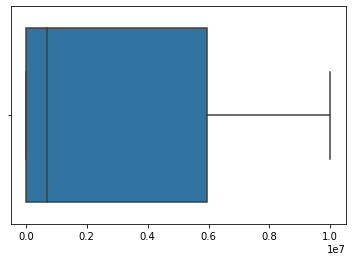

In [6]:
sns.boxplot(respuestas_num)

# Rango intercuartil

In [7]:
IQR = np.percentile(respuestas_num,75)-np.percentile(respuestas_num,25)
IQR_15 = 1.5*IQR

#Imprimimos el rango intercuartil
print((np.percentile(respuestas_num,25)-IQR_15,np.percentile(respuestas_num,75)+IQR_15))

inf = -2238347.5
sup = 15321370.5

#Imprimimos los outliers
for numero in respuestas_num:
  if numero < inf or numero > sup:
    print(numero)

(-8925988.25, 14876671.75)


# Z-Score

In [8]:
#Establecemos el umbral
umbral = 2.0
#Lista donde estaran los outliers
outlier = []


for i in random_nums:
    #Normalizamos y verificamos si es normal o es outlier
    z = (i-media)/desv
    if z > umbral or z < - umbral:
        outlier.append(i)
print(outlier)

[]


En ambas pruebas obruvimos que no hay ningun outier en la muestra

Pregunta Extra (usnado p-value): ¿Si lanzo una moneda 6 veces y las 6 veces sale "Águila", es un evento "normal"?

# Respuesta

La probabilidad de que salga 6 veces águila es $\frac{1}{64}$ ya que hay 64 posibles resultados y solo hay un caso favorable

El único evento que tiene esa misma probabilidad es cuando hay 6 soles seguidos, pues hay 64 posibles resultados y solo un caso favorable

Sumando las probabilidades obtenemos $\frac{1}{32} = 0.03125$ y como el resultado obtenido es menor que $0.05$ entonces concluimos que no es un envento "normal"